<a href="https://colab.research.google.com/github/ruchikaa123/Fruit-Recognition/blob/main/FruitsClassification(InceptionV3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!wget https://www.dropbox.com/s/fxn3ldztzwxm0rw/FruitsData.zip

--2021-08-14 21:47:32--  https://www.dropbox.com/s/fxn3ldztzwxm0rw/FruitsData.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/fxn3ldztzwxm0rw/FruitsData.zip [following]
--2021-08-14 21:47:32--  https://www.dropbox.com/s/raw/fxn3ldztzwxm0rw/FruitsData.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0b397d4923abeb534356692dd9.dl.dropboxusercontent.com/cd/0/inline/BUMx6zHFbvEFVdJp4nhS4_4YRvVqXj7ebZDyqi3eLvQ0OVTaDH3RB8guwEvRW2boF-AWzWSvBEQl_h_YWQCj_Yd61gDVX9edPxKukPzbrNeYcNUNGb8IBzRTMoLn-R2lWYmv3aRuFhCzlPfiCp-40D_e/file# [following]
--2021-08-14 21:47:32--  https://uc0b397d4923abeb534356692dd9.dl.dropboxusercontent.com/cd/0/inline/BUMx6zHFbvEFVdJp4nhS4_4YRvVqXj7ebZDyqi3eLvQ0OVTaDH3RB8guwEvRW2boF-AWzWSvBEQl_h_YWQCj

In [ ]:
!unzip -q "/content/FruitsData.zip"

In [27]:
# Imports required for this project
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

tf.random.set_seed(4)

In [28]:
# Creating the Pathlib PATH objects
train_path = Path("fruits-360/Training")
test_path = Path("fruits-360/Test")

In [29]:
# Getting Image paths 
train_image_paths = list(train_path.glob("*/*"))
train_image_paths = list(map(lambda x : str(x) , train_image_paths))

train_image_paths[:10]

['fruits-360/Training/Pitahaya Red/r_42_100.jpg',
 'fruits-360/Training/Pitahaya Red/r_226_100.jpg',
 'fruits-360/Training/Pitahaya Red/285_100.jpg',
 'fruits-360/Training/Pitahaya Red/r_72_100.jpg',
 'fruits-360/Training/Pitahaya Red/62_100.jpg',
 'fruits-360/Training/Pitahaya Red/r_54_100.jpg',
 'fruits-360/Training/Pitahaya Red/r_254_100.jpg',
 'fruits-360/Training/Pitahaya Red/r_214_100.jpg',
 'fruits-360/Training/Pitahaya Red/r_131_100.jpg',
 'fruits-360/Training/Pitahaya Red/r_263_100.jpg']

In [30]:
# Getting their respective labels 

def get_label(image_path):
    return image_path.split("/")[-2]

train_image_labels = list(map(lambda x : get_label(x) , train_image_paths))
train_image_labels[:10]

['Pitahaya Red',
 'Pitahaya Red',
 'Pitahaya Red',
 'Pitahaya Red',
 'Pitahaya Red',
 'Pitahaya Red',
 'Pitahaya Red',
 'Pitahaya Red',
 'Pitahaya Red',
 'Pitahaya Red']

In [31]:
from sklearn.preprocessing import LabelEncoder 

Le = LabelEncoder()
train_image_labels = Le.fit_transform(train_image_labels)

train_image_labels[:10]

array([101, 101, 101, 101, 101, 101, 101, 101, 101, 101])

In [32]:
train_image_labels = tf.keras.utils.to_categorical(train_image_labels)

train_image_labels[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [33]:
from sklearn.model_selection import train_test_split 

Train_paths , Val_paths , Train_labels , Val_labels = train_test_split(train_image_paths , train_image_labels)

In [34]:
Train_paths[:10] , Train_labels[:10]

(['fruits-360/Training/Banana Red/48_100.jpg',
  'fruits-360/Training/Pear Stone/r_30_100.jpg',
  'fruits-360/Training/Rambutan/73_100.jpg',
  'fruits-360/Training/Apple Braeburn/r_294_100.jpg',
  'fruits-360/Training/Eggplant/r_221_100.jpg',
  'fruits-360/Training/Apple Red 3/r_260_100.jpg',
  'fruits-360/Training/Avocado ripe/r_293_100.jpg',
  'fruits-360/Training/Walnut/137_100.jpg',
  'fruits-360/Training/Tomato Heart/r_307_100.jpg',
  'fruits-360/Training/Mandarine/r_168_100.jpg'],
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

In [35]:
# Function used for Transformation

def load(image , label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image , channels = 3)
    return image , label

In [36]:
# Define IMAGE SIZE and BATCH SIZE 
IMG_SIZE = 224 
BATCH_SIZE = 32

# Basic Transformation
resize = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE)          
])

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor = (-0.3, -0.2))
])

In [37]:
# Function used to Create a Tensorflow Data Object
AUTOTUNE = tf.data.experimental.AUTOTUNE
def get_dataset(paths , labels , train = True):
    image_paths = tf.convert_to_tensor(paths)
    labels = tf.convert_to_tensor(labels)

    image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
    label_dataset = tf.data.Dataset.from_tensor_slices(labels)

    dataset = tf.data.Dataset.zip((image_dataset , label_dataset))

    dataset = dataset.map(lambda image , label : load(image , label))
    dataset = dataset.map(lambda image, label: (resize(image), label) , num_parallel_calls=AUTOTUNE)
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(BATCH_SIZE)

    if train:
        dataset = dataset.map(lambda image, label: (data_augmentation(image), label) , num_parallel_calls=AUTOTUNE)
    
    dataset = dataset.repeat()
    return dataset

In [38]:
# Creating Train Dataset object and Verifying it
%time train_dataset = get_dataset(Train_paths , Train_labels)

image , label = next(iter(train_dataset))
print(image.shape)
print(label.shape)

CPU times: user 304 ms, sys: 13 ms, total: 317 ms
Wall time: 314 ms
(32, 224, 224, 3)
(32, 131)


Chestnut


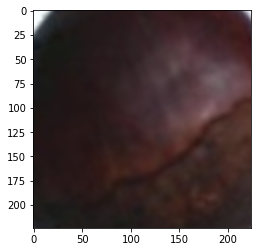

In [39]:
# View a sample Training Image
print(Le.inverse_transform(np.argmax(label , axis = 1))[0])
plt.imshow((image[0].numpy()/255).reshape(224 , 224 , 3))

In [40]:
%time val_dataset = get_dataset(Val_paths , Val_labels , train = False)

image , label = next(iter(val_dataset))
print(image.shape)
print(label.shape)

CPU times: user 30.5 ms, sys: 0 ns, total: 30.5 ms
Wall time: 32.7 ms
(32, 224, 224, 3)
(32, 131)


Nut Forest


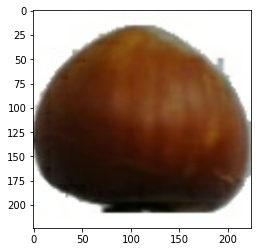

In [41]:
# View a sample Validation Image
print(Le.inverse_transform(np.argmax(label , axis = 1))[0])
plt.imshow((image[0].numpy()/255).reshape(224 , 224 , 3))

In [42]:
# Building InceptionV3 model
from tensorflow.keras.applications import InceptionV3

backbone = InceptionV3(
    input_shape=(224, 224, 3),
    include_top=False
)

model = tf.keras.Sequential([
    backbone,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(131, activation='softmax')
])

model.summary()

87916544/87910968 [==============================] - 1s 0us/step
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 131)               268419    
Total params: 22,071,203
Trainable params: 22,036,771
Non-trainable params: 34,432
_________________________________________________________________


In [43]:
# Compiling your model by providing the Optimizer , Loss and Metrics
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'categorical_crossentropy',
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]
)

In [44]:
# Train the model
history = model.fit(
    train_dataset,
    steps_per_epoch=len(Train_paths)//BATCH_SIZE,
    epochs=1,
    #callbacks=[checkpoint , early_stop],
    validation_data=val_dataset,
    validation_steps = len(Val_paths)//BATCH_SIZE,
)

1586/1586 [==============================] - 597s 370ms/step - loss: 0.5779 - accuracy: 0.8400 - precision: 0.9133 - recall: 0.7924 - val_loss: 4.0178 - val_accuracy: 0.3076 - val_precision: 0.3615 - val_recall: 0.2754


In [45]:
#turning off backbone-doing this we are ensuring that the model has lower chances of overfitting
model.layers[0].trainable = False

In [46]:
# Defining our callbacks 
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_weights.h5",verbose=1,save_best_only=True,save_weights_only = True)
early_stop = tf.keras.callbacks.EarlyStopping(patience=4)

In [47]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 131)               268419    
Total params: 22,071,203
Trainable params: 268,419
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
# Train the model
history = model.fit(
    train_dataset,
    steps_per_epoch=len(Train_paths)//BATCH_SIZE,
    epochs=8,
    callbacks=[checkpoint , early_stop],
    validation_data=val_dataset,
    validation_steps = len(Val_paths)//BATCH_SIZE,
)

Epoch 1/8
  47/1586 [..............................] - ETA: 8:42 - loss: 0.1382 - accuracy: 0.9528 - precision: 0.9615 - recall: 0.9475